# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [30]:
import pandas as pd

sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales

#PD Dataframe è un dizionario dove le chiavi sono le colonne e i valori sono delle liste
# Ogni lista deve avere la stessa lunghezza
# Ogni lista è una colonna del Dataframe

#Punto 1: Trovare il numero di vendite maggiori di 10
disp = sales[sales["sales"] > 10]
display(disp)

#Punto 2: Mostrami i dati del 2018
disp = sales[sales["year"] == 2018]
display(disp)

#Punto3: Mostrami le vendite maggiori di 13 e l'anno è il 2018
disp = sales[(sales["sales"] > 13) & (sales["year"] == 2018)]
display(disp)

#Punto 4: Mostrami tutto tranne i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018
disp = sales[~((sales["sales"] > 13) & (sales["year"] == 2018))]
display(disp)

#Punto 5: Mostrami i dati dove le vendite divise per 3 sono maggiori di 3
disp = sales[sales["sales"] / 3 > 3]
display(disp)

#Punto 6: Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la lettera "J"
disp = sales[sales["employee"] > "J"]
display(disp)

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018


,employee,sales,year
0,Katrina,14,2018


,employee,sales,year
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


,employee,sales,year
0,Katrina,14,2018
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 

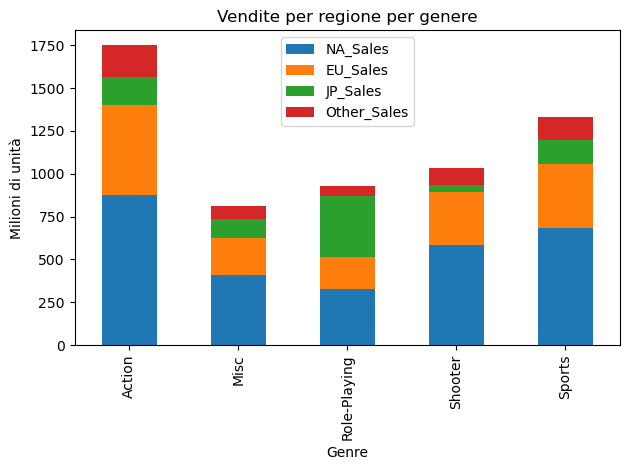


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Numero di videogiochi pubblicati: 11493


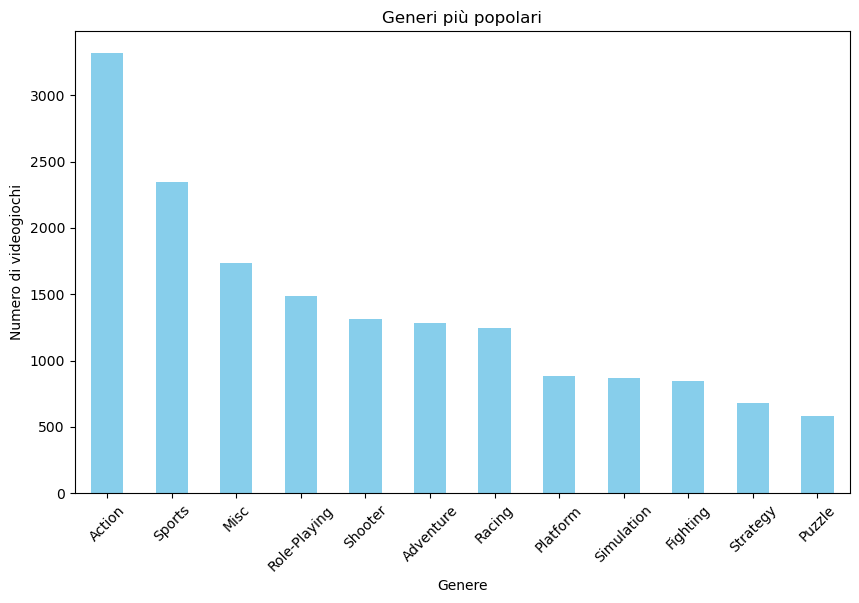

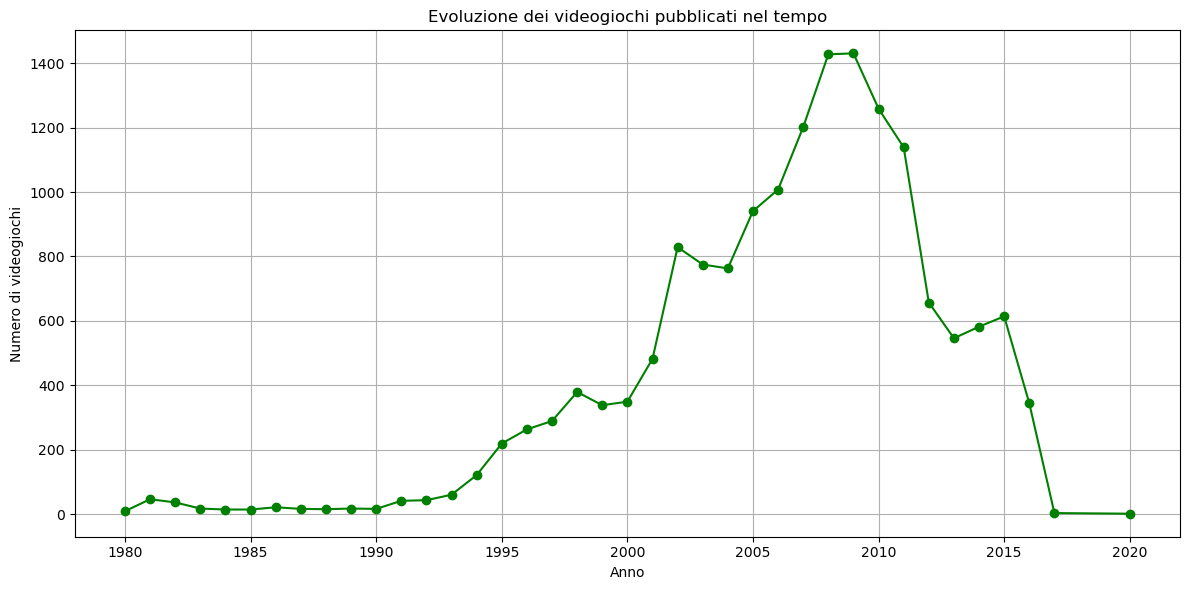

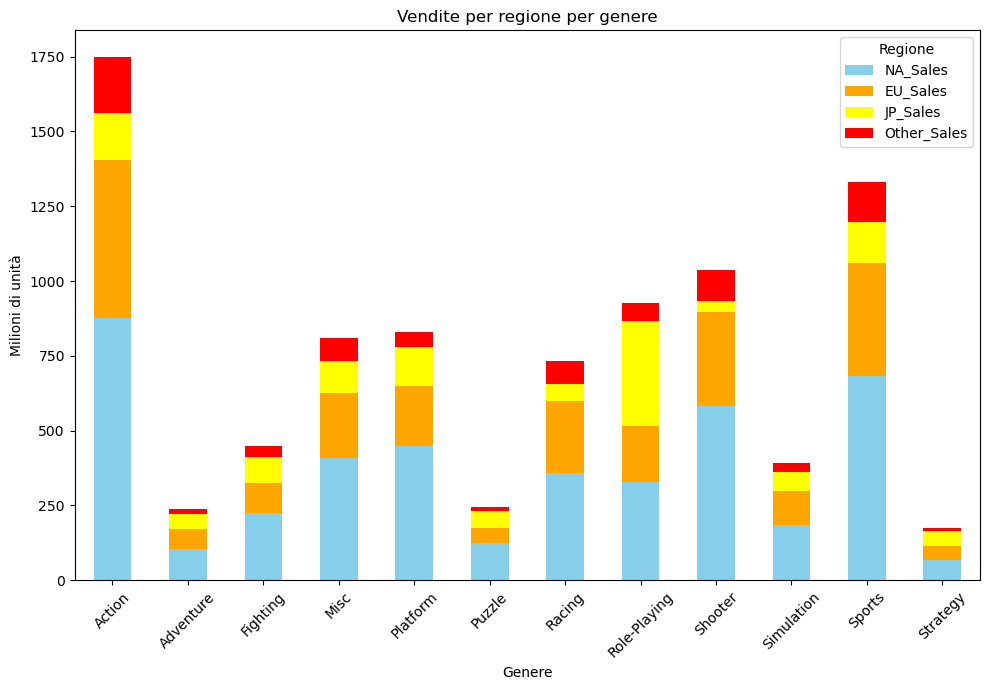

In [56]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
display(df.head())

#Punto 1 = Quanti videogiochi sono stati pubblicati?
num_videogames = df.drop_duplicates(subset="Name").shape[0]
print(f"Numero di videogiochi pubblicati: {num_videogames}")

#Punto 2 = Quali sono i generi più popolari - mostrarlo su un bar plot
generePopolare = df['Genre'].value_counts()

plt.figure(figsize=(10,6))
generePopolare.plot(kind='bar', color='skyblue')
plt.title('Generi più popolari')
plt.xlabel('Genere')
plt.ylabel('Numero di videogiochi')
plt.xticks(rotation=45)
plt.show()

#Punto 3: Graficare evoluzione dei videogiochi pubblicati nel tempo
#Mi assicuro che l'anno sia un dato numerico
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

#Conto i videogiochi pubblicati per anno
videogiochi_per_anno = df['Year'].value_counts().sort_index()

#Creo il grafico
plt.figure(figsize=(12,6))
videogiochi_per_anno.plot(kind='line', marker='o', color='green')
plt.title('Evoluzione dei videogiochi pubblicati nel tempo')
plt.xlabel('Anno')
plt.ylabel('Numero di videogiochi')
plt.grid(True)
plt.tight_layout()
plt.show()

#Punto 4: Provo a riprodurre il grafico sopra mostrato
# Raggruppamento per genere e somma delle vendite per regione
vendite_per_genere = df.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

# Lista di colori accettabili per il plot
colori_ammessi = ["sandybrown", "green", "coral", "orange", "blue", "red", "purple", "yellow", "pink", "cyan", "magenta", "lime", "teal", "gold", "navy", "maroon", "olive", "gray", "black", "white"]

vendite_per_genere.plot(kind='bar', stacked=True, figsize=(10,7),
                        color=["skyblue", "orange", "yellow", "red"])
plt.title("Vendite per regione per genere")
plt.ylabel("Milioni di unità")
plt.xlabel("Genere")
plt.xticks(rotation=45)
plt.legend(title="Regione")
plt.tight_layout()
plt.show()